# Credit risk analysis

## Introduction

This is an analysis of our customer base. It contains:

* Basic characteristics of customers
* Statistics
* Useful insights



## Required  modules

We use the **pandas** library to import and analyze the data.

In [1]:
import pandas as pd
import numpy as np


## Data import

We will import the German Data dataset

In [2]:
data = pd.read_csv("data/german_data_clean.csv")

## Data exploration

In [3]:
# show technical information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   checking_account           1000 non-null   object
 1   duration_months            1000 non-null   int64 
 2   credit_history             1000 non-null   object
 3   purpose                    1000 non-null   object
 4   credit_amount              1000 non-null   int64 
 5   savings                    1000 non-null   object
 6   present_employment_since   1000 non-null   object
 7   installment_rate           1000 non-null   int64 
 8   personal_status_sex        1000 non-null   object
 9   other_deptors              1000 non-null   object
 10  present_residence          1000 non-null   int64 
 11  property                   1000 non-null   object
 12  age_years                  1000 non-null   int64 
 13  other_installment_plans    1000 non-null   object
 14  housing  

In [4]:
# show information about the variables
data.describe()

,duration_months,credit_amount,installment_rate,present_residence,age_years,existing_credits,people_liable_maintenance,response
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


## Selecting columns in pandas

In [5]:
data.columns

Index(['checking_account', 'duration_months', 'credit_history', 'purpose',
       'credit_amount', 'savings', 'present_employment_since',
       'installment_rate', 'personal_status_sex', 'other_deptors',
       'present_residence', 'property', 'age_years', 'other_installment_plans',
       'housing', 'existing_credits', 'job', 'people_liable_maintenance',
       'telephone', 'foreign_worker', 'response'],
      dtype='object')

In [6]:
data['age_years'].mean()

35.546

In [7]:
# show the different purposes
data['purpose'].unique()

array(['radio/television', 'education', 'furniture/equipment',
       'car (new)', 'car (used)', 'business', 'domestic appliances',
       'repairs', 'others', 'retraining'], dtype=object)

In [8]:
# show how much each purpose occurs
data['purpose'].value_counts()

purpose
radio/television       280
car (new)              234
furniture/equipment    181
car (used)             103
business                97
education               50
repairs                 22
domestic appliances     12
others                  12
retraining               9
Name: count, dtype: int64

In [9]:
data

,checking_account,duration_months,credit_history,purpose,credit_amount,savings,present_employment_since,installment_rate,personal_status_sex,other_deptors,...,property,age_years,other_installment_plans,housing,existing_credits,job,people_liable_maintenance,telephone,foreign_worker,response
0,... < 0 euro,6,critical account/other credits existing (not a...,radio/television,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,0
1,0 <= ... < 102 euro,48,existing credits paid back duly till now,radio/television,5951,... < 51 euro,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,1
2,No checking account,12,critical account/other credits existing (not a...,education,2096,... < 51 euro,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,0
3,... < 0 euro,42,existing credits paid back duly till now,furniture/equipment,7882,... < 51 euro,4 <= ... < 7 years,2,male : single,guarantor,...,(if not real estate) building society savings ...,45,none,for free,1,skilled employee / official,2,none,yes,0
4,... < 0 euro,24,delay in paying off in the past,car (new),4870,... < 51 euro,1 <= ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No checking account,12,existing credits paid back duly till now,furniture/equipment,1736,... < 51 euro,4 <= ... < 7 years,3,female : divorced/separated/married,none,...,real estate,31,none,own,1,unskilled - resident,1,none,yes,0
996,... < 0 euro,30,existing credits paid back duly till now,car (used),3857,... < 51 euro,1 <= ... < 4 years,4,male : divorced/separated,none,...,(if not real estate) building society savings ...,40,none,own,1,management/ self-employed/highly qualified emp...,1,"yes, registered under the customers name",yes,0
997,No checking account,12,existing credits paid back duly till now,radio/television,804,... < 51 euro,.. >= 7 years,4,male : single,none,...,"(if not optin 1 or 2) car or other, not in att...",38,none,own,1,skilled employee / official,1,none,yes,0
998,... < 0 euro,45,existing credits paid back duly till now,radio/television,1845,... < 51 euro,1 <= ... < 4 years,4,male : single,none,...,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes,1


In [10]:
# show first 5 rows
data.head()

,checking_account,duration_months,credit_history,purpose,credit_amount,savings,present_employment_since,installment_rate,personal_status_sex,other_deptors,...,property,age_years,other_installment_plans,housing,existing_credits,job,people_liable_maintenance,telephone,foreign_worker,response
0,... < 0 euro,6,critical account/other credits existing (not a...,radio/television,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,0
1,0 <= ... < 102 euro,48,existing credits paid back duly till now,radio/television,5951,... < 51 euro,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,1
2,No checking account,12,critical account/other credits existing (not a...,education,2096,... < 51 euro,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,0
3,... < 0 euro,42,existing credits paid back duly till now,furniture/equipment,7882,... < 51 euro,4 <= ... < 7 years,2,male : single,guarantor,...,(if not real estate) building society savings ...,45,none,for free,1,skilled employee / official,2,none,yes,0
4,... < 0 euro,24,delay in paying off in the past,car (new),4870,... < 51 euro,1 <= ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,1


In [11]:
# show first 20 rows
data.head(20)

,checking_account,duration_months,credit_history,purpose,credit_amount,savings,present_employment_since,installment_rate,personal_status_sex,other_deptors,...,property,age_years,other_installment_plans,housing,existing_credits,job,people_liable_maintenance,telephone,foreign_worker,response
0,... < 0 euro,6,critical account/other credits existing (not a...,radio/television,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,0
1,0 <= ... < 102 euro,48,existing credits paid back duly till now,radio/television,5951,... < 51 euro,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,1
2,No checking account,12,critical account/other credits existing (not a...,education,2096,... < 51 euro,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,0
3,... < 0 euro,42,existing credits paid back duly till now,furniture/equipment,7882,... < 51 euro,4 <= ... < 7 years,2,male : single,guarantor,...,(if not real estate) building society savings ...,45,none,for free,1,skilled employee / official,2,none,yes,0
4,... < 0 euro,24,delay in paying off in the past,car (new),4870,... < 51 euro,1 <= ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,1
5,No checking account,36,existing credits paid back duly till now,education,9055,unknown/ no savings account,1 <= ... < 4 years,2,male : single,none,...,unknown / no property,35,none,for free,1,unskilled - resident,2,"yes, registered under the customers name",yes,0
6,No checking account,24,existing credits paid back duly till now,furniture/equipment,2835,255 euro <= ... < 511 euro,.. >= 7 years,3,male : single,none,...,(if not real estate) building society savings ...,53,none,own,1,skilled employee / official,1,none,yes,0
7,0 <= ... < 102 euro,36,existing credits paid back duly till now,car (used),6948,... < 51 euro,1 <= ... < 4 years,2,male : single,none,...,"(if not optin 1 or 2) car or other, not in att...",35,none,rent,1,management/ self-employed/highly qualified emp...,1,"yes, registered under the customers name",yes,0
8,No checking account,12,existing credits paid back duly till now,radio/television,3059,.. >= 511 euro,4 <= ... < 7 years,2,male : divorced/separated,none,...,real estate,61,none,own,1,unskilled - resident,1,none,yes,0
9,0 <= ... < 102 euro,30,critical account/other credits existing (not a...,car (new),5234,... < 51 euro,unemployed,4,male : married/widowed,none,...,"(if not optin 1 or 2) car or other, not in att...",28,none,own,2,management/ self-employed/highly qualified emp...,1,none,yes,1


In [12]:
# show the final rows
data.tail()

,checking_account,duration_months,credit_history,purpose,credit_amount,savings,present_employment_since,installment_rate,personal_status_sex,other_deptors,...,property,age_years,other_installment_plans,housing,existing_credits,job,people_liable_maintenance,telephone,foreign_worker,response
995,No checking account,12,existing credits paid back duly till now,furniture/equipment,1736,... < 51 euro,4 <= ... < 7 years,3,female : divorced/separated/married,none,...,real estate,31,none,own,1,unskilled - resident,1,none,yes,0
996,... < 0 euro,30,existing credits paid back duly till now,car (used),3857,... < 51 euro,1 <= ... < 4 years,4,male : divorced/separated,none,...,(if not real estate) building society savings ...,40,none,own,1,management/ self-employed/highly qualified emp...,1,"yes, registered under the customers name",yes,0
997,No checking account,12,existing credits paid back duly till now,radio/television,804,... < 51 euro,.. >= 7 years,4,male : single,none,...,"(if not optin 1 or 2) car or other, not in att...",38,none,own,1,skilled employee / official,1,none,yes,0
998,... < 0 euro,45,existing credits paid back duly till now,radio/television,1845,... < 51 euro,1 <= ... < 4 years,4,male : single,none,...,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes,1
999,0 <= ... < 102 euro,45,critical account/other credits existing (not a...,car (used),4576,51 <= ... < 255 euro,unemployed,3,male : single,none,...,"(if not optin 1 or 2) car or other, not in att...",27,none,own,1,skilled employee / official,1,none,yes,0


In [13]:
# show the dimensions of the dataset
data.shape

(1000, 21)

## Selecting multiple columns

In [14]:
data['age_years']

0      67
1      22
2      49
3      45
4      53
       ..
995    31
996    40
997    38
998    23
999    27
Name: age_years, Length: 1000, dtype: int64

In [15]:
# select multiple columns by a list
data[['age_years', 'purpose']]

,age_years,purpose
0,67,radio/television
1,22,radio/television
2,49,education
3,45,furniture/equipment
4,53,car (new)
...,...,...
995,31,furniture/equipment
996,40,car (used)
997,38,radio/television
998,23,radio/television


## Apply calculations 

In [16]:
data['credit_amount'] / data['duration_months']

0      194.833333
1      123.979167
2      174.666667
3      187.666667
4      202.916667
          ...    
995    144.666667
996    128.566667
997     67.000000
998     41.000000
999    101.688889
Length: 1000, dtype: float64

In [17]:
data['monthly_payment'] = data['credit_amount'] / data['duration_months']

In [18]:
data

,checking_account,duration_months,credit_history,purpose,credit_amount,savings,present_employment_since,installment_rate,personal_status_sex,other_deptors,...,age_years,other_installment_plans,housing,existing_credits,job,people_liable_maintenance,telephone,foreign_worker,response,monthly_payment
0,... < 0 euro,6,critical account/other credits existing (not a...,radio/television,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,...,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,0,194.833333
1,0 <= ... < 102 euro,48,existing credits paid back duly till now,radio/television,5951,... < 51 euro,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,22,none,own,1,skilled employee / official,1,none,yes,1,123.979167
2,No checking account,12,critical account/other credits existing (not a...,education,2096,... < 51 euro,4 <= ... < 7 years,2,male : single,none,...,49,none,own,1,unskilled - resident,2,none,yes,0,174.666667
3,... < 0 euro,42,existing credits paid back duly till now,furniture/equipment,7882,... < 51 euro,4 <= ... < 7 years,2,male : single,guarantor,...,45,none,for free,1,skilled employee / official,2,none,yes,0,187.666667
4,... < 0 euro,24,delay in paying off in the past,car (new),4870,... < 51 euro,1 <= ... < 4 years,3,male : single,none,...,53,none,for free,2,skilled employee / official,2,none,yes,1,202.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No checking account,12,existing credits paid back duly till now,furniture/equipment,1736,... < 51 euro,4 <= ... < 7 years,3,female : divorced/separated/married,none,...,31,none,own,1,unskilled - resident,1,none,yes,0,144.666667
996,... < 0 euro,30,existing credits paid back duly till now,car (used),3857,... < 51 euro,1 <= ... < 4 years,4,male : divorced/separated,none,...,40,none,own,1,management/ self-employed/highly qualified emp...,1,"yes, registered under the customers name",yes,0,128.566667
997,No checking account,12,existing credits paid back duly till now,radio/television,804,... < 51 euro,.. >= 7 years,4,male : single,none,...,38,none,own,1,skilled employee / official,1,none,yes,0,67.000000
998,... < 0 euro,45,existing credits paid back duly till now,radio/television,1845,... < 51 euro,1 <= ... < 4 years,4,male : single,none,...,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes,1,41.000000


In [19]:
# conditional column
data['purpose'].unique()

array(['radio/television', 'education', 'furniture/equipment',
       'car (new)', 'car (used)', 'business', 'domestic appliances',
       'repairs', 'others', 'retraining'], dtype=object)

In [20]:
data['credit_amount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: credit_amount, dtype: float64

In [21]:
car_loans = ['car (new)', 'car (used)']

data['car_loans'] = np.where(data['purpose'].isin(car_loans), "car_loans", "non_car_loans")
data['high_car_loans'] = np.where((data['car_loans'] == "car_loans") & (data['credit_amount'] > 5000), "high_car_loans", "regular")

data['high_car_loans'].value_counts()

high_car_loans
regular           911
high_car_loans     89
Name: count, dtype: int64

## Filtering data

In [22]:
# using 'query' to filter the data
data.query("age_years < 20")

,checking_account,duration_months,credit_history,purpose,credit_amount,savings,present_employment_since,installment_rate,personal_status_sex,other_deptors,...,housing,existing_credits,job,people_liable_maintenance,telephone,foreign_worker,response,monthly_payment,car_loans,high_car_loans
391,0 <= ... < 102 euro,12,existing credits paid back duly till now,furniture/equipment,983,.. >= 511 euro,... < 1 year,1,female : divorced/separated/married,none,...,rent,1,unskilled - resident,1,none,yes,0,81.916667,non_car_loans,regular
633,No checking account,9,existing credits paid back duly till now,furniture/equipment,1980,... < 51 euro,... < 1 year,2,female : divorced/separated/married,co-applicant,...,rent,2,skilled employee / official,1,none,yes,1,220.000000,non_car_loans,regular


In [23]:
# combine queries
data.query("age_years > 50 & purpose == 'business'")

,checking_account,duration_months,credit_history,purpose,credit_amount,savings,present_employment_since,installment_rate,personal_status_sex,other_deptors,...,housing,existing_credits,job,people_liable_maintenance,telephone,foreign_worker,response,monthly_payment,car_loans,high_car_loans
29,... < 0 euro,60,delay in paying off in the past,business,6836,... < 51 euro,.. >= 7 years,3,male : single,none,...,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1,113.933333,non_car_loans,regular
33,No checking account,12,critical account/other credits existing (not a...,business,1264,unknown/ no savings account,.. >= 7 years,4,male : single,none,...,rent,1,unskilled - resident,1,none,yes,0,105.333333,non_car_loans,regular
62,0 <= ... < 102 euro,36,no credits taken/ all credits paid back duly,business,1953,... < 51 euro,.. >= 7 years,4,male : single,none,...,for free,1,management/ self-employed/highly qualified emp...,1,"yes, registered under the customers name",yes,1,54.250000,non_car_loans,regular
95,0 <= ... < 102 euro,54,no credits taken/ all credits paid back duly,business,15945,... < 51 euro,... < 1 year,3,male : single,none,...,rent,1,skilled employee / official,1,"yes, registered under the customers name",yes,1,295.277778,non_car_loans,regular
190,No checking account,24,existing credits paid back duly till now,business,4591,.. >= 511 euro,1 <= ... < 4 years,2,male : single,none,...,own,3,management/ self-employed/highly qualified emp...,1,"yes, registered under the customers name",yes,1,191.291667,non_car_loans,regular
213,>= 102 euro,30,delay in paying off in the past,business,1908,... < 51 euro,.. >= 7 years,4,male : single,none,...,own,1,management/ self-employed/highly qualified emp...,1,"yes, registered under the customers name",yes,1,63.600000,non_car_loans,regular
237,0 <= ... < 102 euro,21,existing credits paid back duly till now,business,2767,51 <= ... < 255 euro,.. >= 7 years,4,male : divorced/separated,none,...,rent,2,unskilled - resident,1,none,yes,1,131.761905,non_car_loans,regular
430,No checking account,5,existing credits paid back duly till now,business,3448,... < 51 euro,4 <= ... < 7 years,1,male : single,none,...,own,1,unskilled - resident,1,none,yes,0,689.600000,non_car_loans,regular
606,No checking account,24,critical account/other credits existing (not a...,business,4526,... < 51 euro,1 <= ... < 4 years,3,male : single,none,...,own,1,management/ self-employed/highly qualified emp...,1,"yes, registered under the customers name",yes,0,188.583333,non_car_loans,regular
728,0 <= ... < 102 euro,48,all credits at this bank paid back duly,business,6416,... < 51 euro,.. >= 7 years,4,female : divorced/separated/married,none,...,rent,1,skilled employee / official,1,none,yes,1,133.666667,non_car_loans,regular


In [24]:
selected_purposes = ['education', 'retraining']

data.query("purpose == @selected_purposes") # SQL Equivalent: WHERE purpose in ('education', 'retraining')

,checking_account,duration_months,credit_history,purpose,credit_amount,savings,present_employment_since,installment_rate,personal_status_sex,other_deptors,...,housing,existing_credits,job,people_liable_maintenance,telephone,foreign_worker,response,monthly_payment,car_loans,high_car_loans
2,No checking account,12,critical account/other credits existing (not a...,education,2096,... < 51 euro,4 <= ... < 7 years,2,male : single,none,...,own,1,unskilled - resident,2,none,yes,0,174.666667,non_car_loans,regular
5,No checking account,36,existing credits paid back duly till now,education,9055,unknown/ no savings account,1 <= ... < 4 years,2,male : single,none,...,for free,1,unskilled - resident,2,"yes, registered under the customers name",yes,0,251.527778,non_car_loans,regular
36,No checking account,48,critical account/other credits existing (not a...,education,6110,... < 51 euro,1 <= ... < 4 years,1,male : single,none,...,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes,0,127.291667,non_car_loans,regular
68,No checking account,36,existing credits paid back duly till now,education,1819,... < 51 euro,1 <= ... < 4 years,4,male : single,none,...,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes,1,50.527778,non_car_loans,regular
74,... < 0 euro,36,existing credits paid back duly till now,education,1977,unknown/ no savings account,.. >= 7 years,4,male : single,none,...,own,1,management/ self-employed/highly qualified emp...,1,"yes, registered under the customers name",yes,1,54.916667,non_car_loans,regular
87,0 <= ... < 102 euro,36,existing credits paid back duly till now,education,12612,51 <= ... < 255 euro,1 <= ... < 4 years,1,male : single,none,...,for free,1,skilled employee / official,2,"yes, registered under the customers name",yes,1,350.333333,non_car_loans,regular
96,No checking account,12,critical account/other credits existing (not a...,education,2012,unknown/ no savings account,4 <= ... < 7 years,4,female : divorced/separated/married,none,...,own,1,skilled employee / official,1,none,yes,0,167.666667,non_car_loans,regular
111,>= 102 euro,15,existing credits paid back duly till now,education,392,... < 51 euro,... < 1 year,4,female : divorced/separated/married,none,...,rent,1,skilled employee / official,1,"yes, registered under the customers name",yes,0,26.133333,non_car_loans,regular
131,... < 0 euro,36,delay in paying off in the past,education,6887,... < 51 euro,1 <= ... < 4 years,4,male : single,none,...,own,1,skilled employee / official,1,"yes, registered under the customers name",yes,1,191.305556,non_car_loans,regular
157,... < 0 euro,12,all credits at this bank paid back duly,retraining,339,... < 51 euro,.. >= 7 years,4,male : married/widowed,none,...,own,1,unskilled - resident,1,none,yes,0,28.250000,non_car_loans,regular


## Aggragation in Pandas

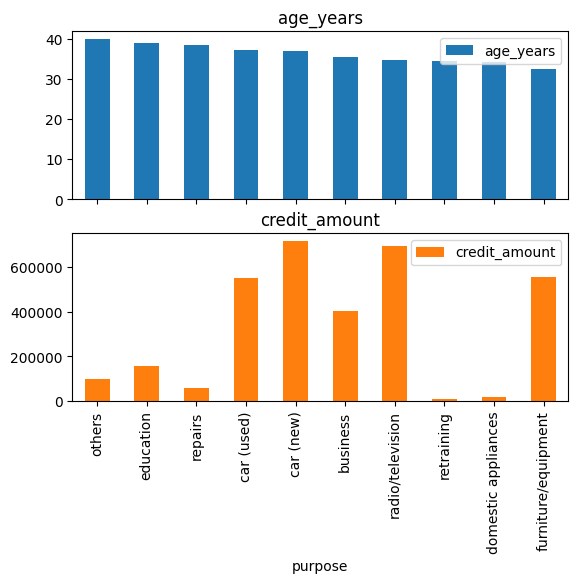

In [33]:
data_overview_age = (data
                     .groupby('purpose')
                     .agg({'age_years': 'mean',
                           'credit_amount': 'sum'})
                     .reset_index()     
                     .sort_values(by="age_years", ascending=False)
                     .plot
                     .bar(x='purpose', y=['age_years', 'credit_amount'], subplots=True)
                    )

In [31]:
data_overview_age

,purpose,age_years,credit_amount
6,others,39.916667,98512
4,education,38.940000,159020
8,repairs,38.545455,60018
2,car (used),37.252427,553133
1,car (new),37.089744,716748
0,business,35.484536,403330
7,radio/television,34.700000,696543
9,retraining,34.666667,10853
3,domestic appliances,34.250000,17976
5,furniture/equipment,32.458564,555125


In [123]:
type(data_overview_age)

pandas.core.groupby.generic.DataFrameGroupBy

In [121]:
data_overview_age.columns

Index(['purpose', 'age_years', 'credit_amount'], dtype='object')

In [79]:
name = "arie"
name.upper()

'ARIE'

In [76]:
data_overview_age

<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x00000288A568C250>>